# Hierachical Clustering Task

## Import the libraries, Loading the data and Data Preprocessing

In [11]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
df = pd.read_csv('Iris.csv',index_col=0)



# Sepal Length vs Petal Length

In [12]:
# Select useful features
X = df[['SepalLengthCm','PetalLengthCm']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

# Select K
K = 5

Data size:
(150, 2)


# Clustering: SepalLengthCm vs PetalLengthCm

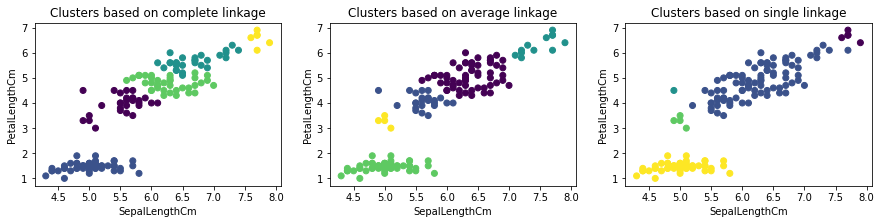

In [13]:
plt.figure(figsize=[15,3])

linkage_types = ['complete', 'average', 'single']

for i, l in enumerate(linkage_types):
  plt.subplot(1, 3, i+1)
  
  cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=l)
  cluster.fit_predict(X)

  ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
  
  plt.title('Clusters based on {} linkage'.format(l))
  plt.xlabel('SepalLengthCm')
  plt.ylabel('PetalLengthCm')
 
L = 'complete'

metricstr or function, optional
The distance metric to use. The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.

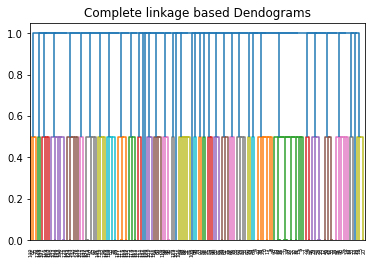

In [17]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='complete', metric='jaccard'))  

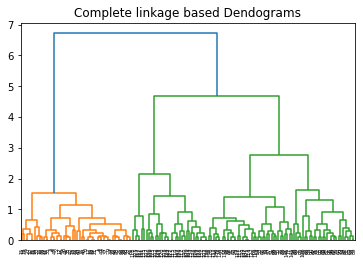

In [18]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='complete', metric='euclidean')) 

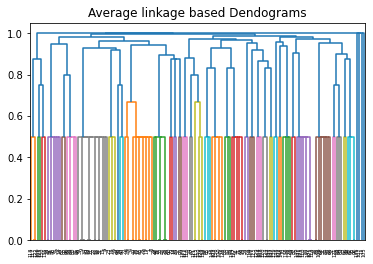

In [20]:
plt.title("Average linkage based Dendograms")  
dend = dendrogram(linkage(X, method='average', metric='jaccard')) 

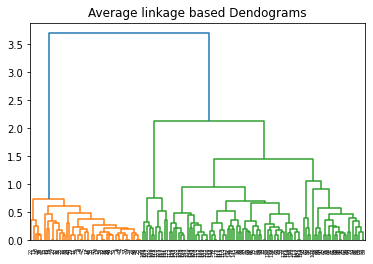

In [21]:
plt.title("Average linkage based Dendograms")  
dend = dendrogram(linkage(X, method='average', metric='euclidean')) 

# Complete linkage based Dendograms

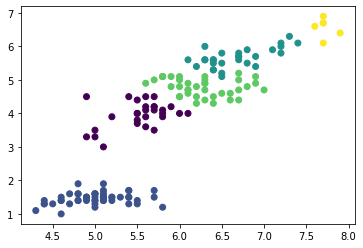

In [30]:
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

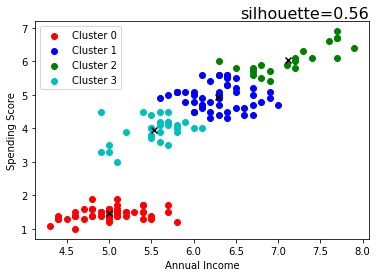

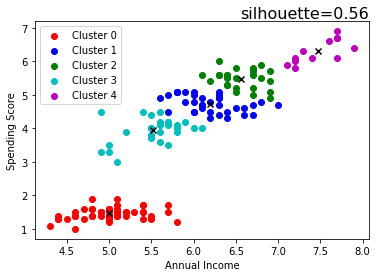

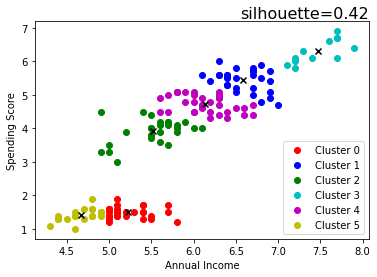

In [35]:
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
def scatter_Kmeans(x, k = 3, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(4,7):
  scatter_Kmeans(X, k, r=0)

## Thus we see that the best silhouette score is actually achieved using k=5.